# Data Visualization with `matplotlib` (and pandas)

<img src="images/f2.jfif" style="width:500px;height:500px">

<img src="images/piechart.jpg">

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd

# Objectives

- Choose appropriate graph types based on data and problem context for explanatory visualizations
- Use `matplotlib` syntax to create graphs and adjust elements
- Create figures containing multiple graphs
- Use Pandas for discovery plots

<img src="images/f1.jfif">

# Visualization Motivation

## Why Visualize Data?

Why can’t we just hand someone a table of data?

Let's load up the iris data set.  This is a famous built-in dataset which is used to learn about categorization. 

In [30]:
data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
df_iris['target'] = data['target']

Here is an image of one of the Virginica Iris, which is unique in its relative petal and sepal length.  There are 3 unique species of Iris.

<img src="images/iris.jpeg" style="width:500px;height:500px">

## Dataframe vs Graph: Which do you prefer?

In [31]:
#print(df_iris['target'].unique())
print(df_iris.sample(5, random_state=42))


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
73                 6.1               2.8                4.7               1.2   
18                 5.7               3.8                1.7               0.3   
118                7.7               2.6                6.9               2.3   
78                 6.0               2.9                4.5               1.5   
76                 6.8               2.8                4.8               1.4   

     target  
73        1  
18        0  
118       2  
78        1  
76        1  


In [32]:
%%capture plot1
fig, ax = plt.subplots(figsize=(8, 5))

# Iterate through each type of flower and plot them using different colors
for flower in df_iris['target'].unique():
    subset_df = df_iris[df_iris['target'] == flower]
    x = subset_df['sepal length (cm)']
    y = subset_df['petal length (cm)']
    
    ax.scatter(x, y, label=data['target_names'][flower])

# Label your axes!
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_title('Petal length vs Sepal Length for Three Species of Flowers')
ax.legend();

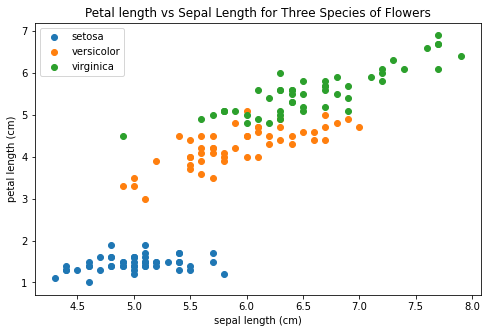

In [33]:
plot1()

What information in this graph jumps out to you?

In [ ]:
# your thoughts here



## The Effectiveness of Visualizations

- People are highly visual and can synthesize visual information much more quickly than rows and columns of numbers 
- Precognitive understanding of the data
- Visual representations can be much more viscerally persuasive 
- Visuals can help us identify patterns in the data to investigate

# What Makes an Effective Visualization?

Today, we want to focus on making data visualizations that an audience can easily comprehend and digest. 
- These visualizations are typically referred to as **explanatory** visualizations. 

Our goal in explanatory visualizations is to convey/communicate your insight(s) effectively to our audience.
- That audience can be other data scientist but could also be stakeholders unfamiliar with data analysis or statistical concepts.

 **NOTE**
2 types of Visualizations
1. <b>Explanatory</b> - meant to communicate insight to an audience
  - Need to be clean an crisp
2. <b>Exploratory</b>  - used when exploring the data and meant only for our use...not for an audience 
  - No need for tidy, clean, crisp visualizations (i.e.) axis titles and plot title not needed
 

<b>Explanatory Visualization</b><br>
- Each graph should have a clear point it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective

- Know your audience!

- Choosing the correct graph for the relationship you are trying to communicate

- Label your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent



- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
    - Red and Down tends to be negative while Green and Up is positive
    - Lighter hues are seen as lower values and darker is higher values
    - Axis start at zero
       
- KISS  -> Keep It Simple, Stupid
    - More complicated a chart is, the harder it is to understand!
    
<p>
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct

## Anatomy of Visualizations

### Length & Size

![](https://seaborn.pydata.org/_images/seaborn-barplot-111.png)

![](http://thedailyviz.com/wp-content/uploads/2012/08/guns-620x415.png')

![](https://seaborn.pydata.org/_images/scatterplot_19_0.png)

### Color

![](https://seaborn.pydata.org/_images/scatterplot_13_0.png)
![](https://seaborn.pydata.org/_images/seaborn-barplot-10.png)

### Shape

![](https://seaborn.pydata.org/_images/scatterplot_9_0.png)

### Angle 

![](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/55b6d08fe4b0d8b921b02f83/55b6d0b6e4b0d8b921b03a36/1438044342911/1000w/)





![](https://policyviz.com/wp-content/uploads/2018/02/share-of-us-agricultural-exports-value-01-1140x700.png)


  

 
![](https://i.stack.imgur.com/w4sB9.png)

## What Types Work Well Consistently

Experts and researchers found the best visual patterns humans identify well:

> - Positional changes (scatter plots)
> - Length changes (bar charts)

But we're bad at understanding other patterns...

> - Color hue changes 
> - Area changes (pie charts!)

## How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns
    - Using two different y axis scales to compare trends
    - Showing cumulative data which will always be increasing to hide a downturn in a trend
    - Pie charts (comparing degrees is not something people are good at) just use a bar chart
    - Inconsistent units
    - Not showing all of the data for motivated reasons
    - Percentages not adding up to 100

<img src="images/pie-chart-misleading.png">

image: http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/

## Some Bad  Plots

<img src="images/bad1.jpg">

<img src="images/bad2.png">

<img src="images/bad3.png">

Here is a great link for choosing what type of plots to use<br>
https://www.analyticsvidhya.com/blog/2021/09/how-to-choose-the-right-chart-for-data-visualization/


# Creating Data Visualization with `matplotlib`

There are [lots](https://python-graph-gallery.com) of different ways of plotting data! (See also [this page](https://datavizproject.com/).)

Most useful are:

- bar plots
- box plots
- histograms
- line plots
- scatter plots

<table>
    <tr><td style="text-align:center"><b>Bar Charts</b><img src="images/bar.png"></td>
        <td style="text-align:center"><b>Histogram</b><img src="images/histo.jfif"></td>
    </tr>
</table>

<table>
    <tr><td style="text-align:center"><b>Line Plots</b><img src="images/line.png"></td>
        <td style="text-align:center"><b>Scatter Plots</b><img src="images/scatter-1.png"></td>
    </tr>
</table>

<table>
    <tr><td style="text-align:center"><b>Box Plots</b><img src="images/box.jfif"></td>
    </tr>
</table>

These can all be handled by `matplotlib` and `seaborn` and `pandas`. These packages are great for data that exists in `pandas`.

## Anatomy of `matplotlib` Figure

<img src="images/matplotlib_anatomy.png">

Explanation of non-obvious terms:

__Figure__ - This is the "sheet of paper" all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

## Plotting Syntax

- There are many different ways to create plots but we will strongly suggest using the subplots method
    - Useful for extensibility 
    - Access to the figure and individual axis in a plot
    - More fine-grained control of customizing your plot
    - Easily create additional axis on your figure
    - Good level of abstraction
        - You can go deeper into the api but this should give you immediate access to most tools you will need for whatever plot you are making
    - Flatiron Specifc
        - Plotting code will be more easily readable for other students and instructors
        - You don’t need to remember many different ways to organize your code

Here are links to the [matplotlib documentation](https://matplotlib.org/index.html) as well as the [Axes object documentation](https://matplotlib.org/api/axes_api.html):

We will now walk through some common charts and their uses, while practicing our `matplotlib` syntax.

### Common Charts and Their Uses

Here is a great link for choosing what type of plots to use<br>
https://www.analyticsvidhya.com/blog/2021/09/how-to-choose-the-right-chart-for-data-visualization/


#### Scatter Plots

Scatter plots are very common.  They allow one to visualize the relationship between two variables. 
- If you have two variables that pair well together

In the plots below, we see different correlations between variables:

In [35]:
penguins = sns.load_dataset('penguins')

In [36]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


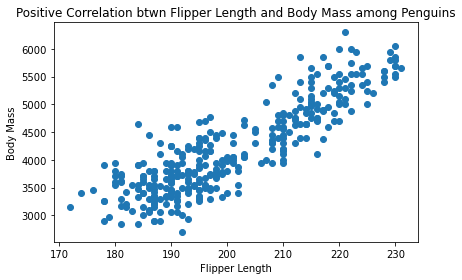

In [37]:
# This is the plotting syntax we recommend. Note that plt.subplots()
# returns a _double_: the figure object and the axis object.

fig, ax = plt.subplots()

ax.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
ax.set_xlabel('Flipper Length')
ax.set_ylabel('Body Mass')
ax.set_title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')

plt.tight_layout()

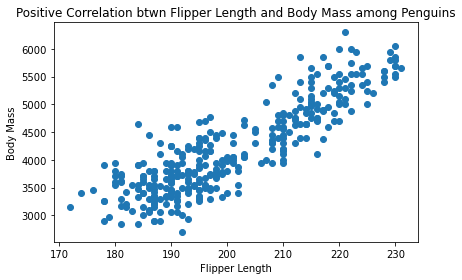

In [38]:
# You will also see this syntax, but it gives you less control over
# the plot! What similarities and differences do you see between
# this syntax and the subplots syntax?

plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')
plt.title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')

plt.tight_layout()

We can also change [color](https://matplotlib.org/3.1.0/gallery/color/named_colors.html), opacity, marker size, and [marker symbol](https://matplotlib.org/3.2.1/api/markers_api.html).

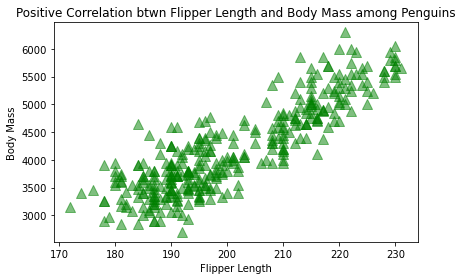

In [52]:
fig, ax = plt.subplots()

ax.scatter(x=penguins['flipper_length_mm'], y=penguins['body_mass_g'],
            c='green',
            alpha=0.5,
            s=100,
            marker='^')

ax.set_xlabel('Flipper Length')
ax.set_ylabel('Body Mass')
ax.set_title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')


plt.tight_layout()

We can also identify colors by hexadecimal code, one each for the amount of red, green, and blue. Values range from '00' to 'ff'.

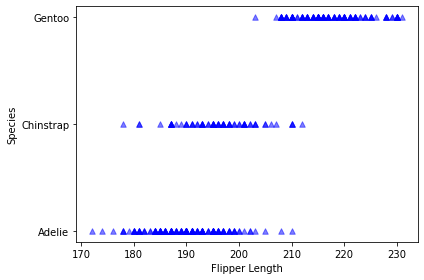

In [53]:
fig, ax = plt.subplots()

ax.scatter(x=penguins['flipper_length_mm'], y=penguins['species'],
            c='#0000ff',
            alpha=0.5,
            s=30,
            marker='^')

ax.set_xlabel('Flipper Length')
ax.set_ylabel('Species')

plt.tight_layout()

##### Pandas Scatter 

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

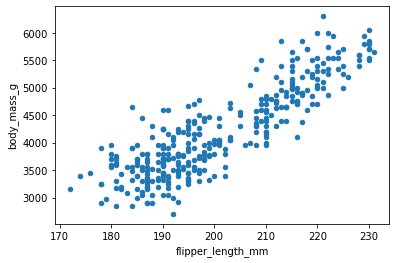

In [41]:
penguins.plot.scatter("flipper_length_mm","body_mass_g")

Pandas can do most things matplotlib can do b/c it is built on top of matplotlib

Text(0.5, 1.0, 'Positive Correlation btwn Flipper Length and Body Mass among Penguins')

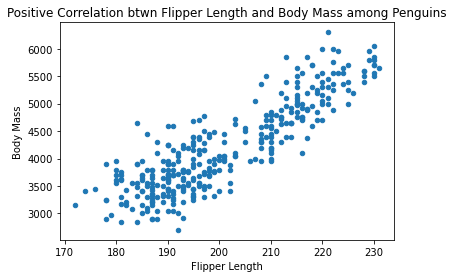

In [54]:
ax = penguins.plot.scatter("flipper_length_mm","body_mass_g")
ax.set_xlabel('Flipper Length')
ax.set_ylabel('Body Mass')
ax.set_title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')


#### Histograms

Histograms create uniform bins across the entire range of a continuous variable. They then count the number of data points which fall into each bin.

Histograms are good for viewing the distribution of a series of numbers.

Histograms are often confused with bar charts, since they look somewhat similar.  The big difference, however, is that histograms visualize the distribution of a continuous variable, rather than the discrete variable shown by barcharts. You can remember this because the bins of histograms don't have spaces between them.

![histogram_ex](images/histogram_example.svg)

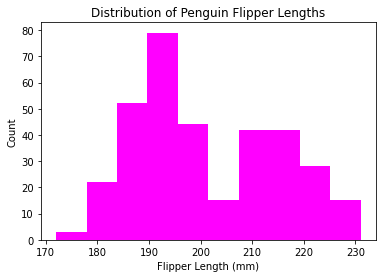

In [25]:
# Here is a histogram of body masses from the Penguins Dataset

variable = penguins['flipper_length_mm']

fig, ax = plt.subplots()
ax.hist(variable, color='magenta')
ax.set_xlabel('Flipper Length (mm)');
ax.set_ylabel('Count')
ax.set_title('Distribution of Penguin Flipper Lengths');

##### Histogram using Pandas

array([[<AxesSubplot:title={'center':'flipper_length_mm'}>]], dtype=object)

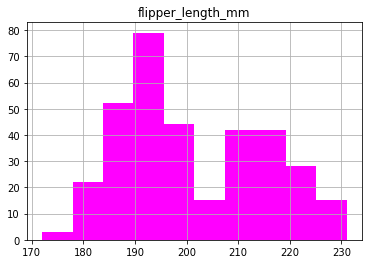

In [26]:
penguins.hist(column = 'flipper_length_mm',color="magenta",bins=10)

#### Box Plots

In [ ]:
penguins.head()

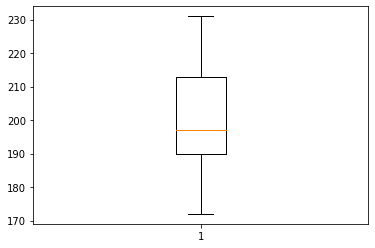

In [26]:
fig, ax = plt.subplots()

ax.boxplot(penguins['flipper_length_mm'].dropna());

##### Pandas boxplot

<AxesSubplot:>

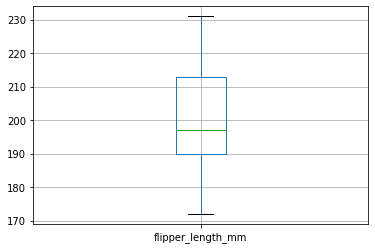

In [46]:
penguins.boxplot(column='flipper_length_mm')
#penguins.boxplot(column=['bill_depth_mm',"bill_length_mm"])


#### Bar Plots

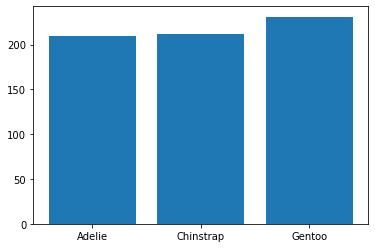

In [38]:
fig, ax = plt.subplots()

ax.bar(data=penguins, x='species', height='flipper_length_mm');

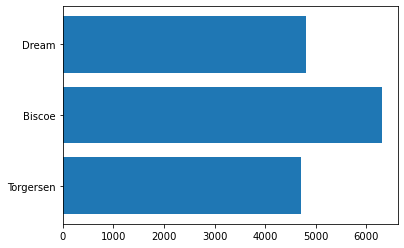

In [29]:
fig, ax = plt.subplots()

ax.barh(data=penguins, y='island', width='body_mass_g');

##### Pandas Bar Plots

<AxesSubplot:>

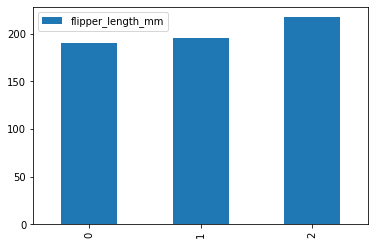

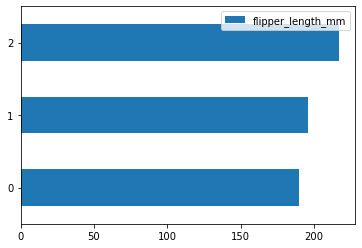

In [51]:

penguins.groupby("species",as_index=False).mean().plot(kind="bar",y='flipper_length_mm')
penguins.groupby("species",as_index=False).mean().plot(kind="barh",y='flipper_length_mm')

#### Line Plot

Tracks the change of a single  (or multiple) variable(s) over time.  They are generally better than bar graphs over shorter periods of time.

Here is some code to read in some well worn shampoo sales data over a three year period.

In [6]:
shampoo = pd.read_csv('data/sales-of-shampoo-over-a-three-ye.csv')[:-1]

shampoo

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


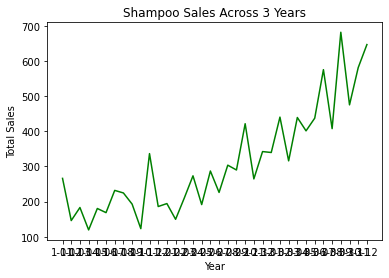

In [7]:
fig, ax = plt.subplots()

ax.plot(shampoo['Month'],
         shampoo['Sales of shampoo over a three year period'],
         color='g')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales');

The xticks are illegible in the plot above.

One way to combat that is to try [rotating](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html) the ticks.

While we're at it, let's also change the [linestyle](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html).

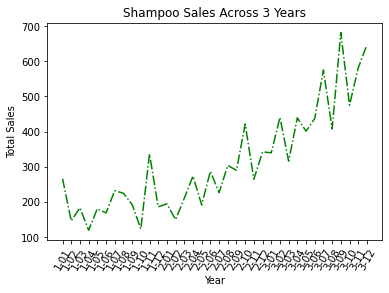

In [8]:
fig, ax = plt.subplots()

ax.plot(shampoo['Month'],
         shampoo['Sales of shampoo over a three year period'],
         color='g', linestyle='dashdot')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
plt.xticks(shampoo['Month'],
                   rotation=60);

Maybe better to make custom ticks:

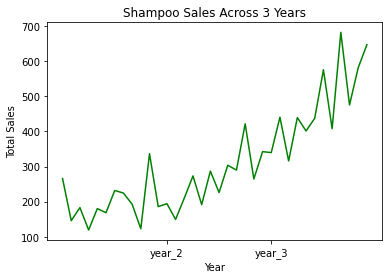

In [9]:
fig, ax = plt.subplots()

ax.plot(shampoo.index,
        shampoo['Sales of shampoo over a three year period'],
        color='g')
plt.xticks(range(12, 36, 12), labels=['year_2', 'year_3'])
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales');

If we want to add multiple plots on one axis, we can simply call the plotting functions one after the other.

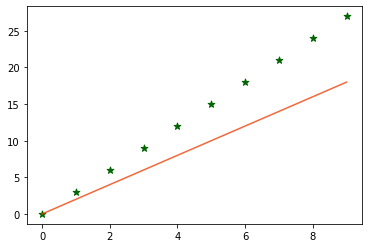

In [13]:
fig, ax = plt.subplots()

X = range(10)

Y1 = [2*x for x in X]
Y2 = [3*x for x in X]

ax.plot(X, Y1, c='#ef4209', alpha=0.8)
ax.scatter(X, Y2, c='darkgreen', marker='*', s=50);

##### Panda's Line Plot

<AxesSubplot:xlabel='Month'>

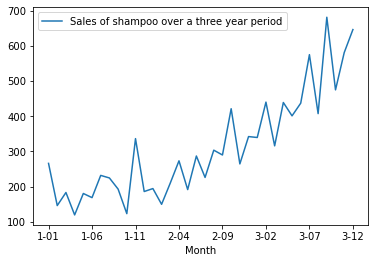

In [10]:
shampoo.plot.line("Month",'Sales of shampoo over a three year period')

#### Multiple Plots per Page

fix,ax = plt.subplots(nrows=nr,ncols=nc)

ax will be a numpy  of all the axis' and will have rowsxcolumns members in the list 

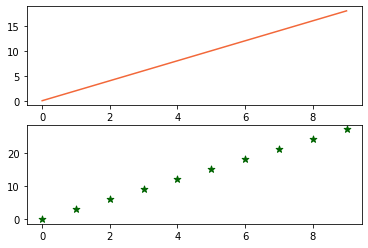

In [23]:
fig, ax = plt.subplots(nrows=2,ncols=1)

X = range(10)

Y1 = [2*x for x in X]
Y2 = [3*x for x in X]

ax[0].plot(X, Y1, c='#ef4209', alpha=0.8)
ax[1].scatter(X, Y2, c='darkgreen', marker='*', s=50);


More complex Multiple Plots per Page

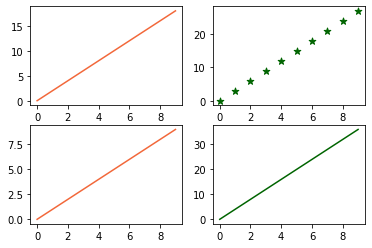

In [29]:
fig, ax = plt.subplots(nrows=2,ncols=2)

X = range(10)

Y1 = [2*x for x in X]
Y2 = [3*x for x in X]
Y3 = [x for x in X]
Y4 = [4*x for x in X]


ax[0][0].plot(X, Y1, c='#ef4209', alpha=0.8)
ax[0][1].scatter(X, Y2, c='darkgreen', marker='*', s=50)

ax[1][0].plot(X, Y3, c='#ef4209', alpha=0.8)
ax[1][1].plot(X, Y4, c='darkgreen')


## Saving your figures

In [ ]:
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.set_title('Parabola with words')
ax.text(s='random comment', x=0, y=3)
ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

# Let's save it!
plt.savefig('images/parabola.png')

Let's make sure the image has been saved!

<img src="images/f3.jfif" style="width:500px;height:500px">

# Exercises

## Customize Your Visualization

First, let's create a scatter plot from the `penguins` dataset of the length of their bill `bill_length_mm` and length of their flipper `flipper_length_mm`. Make sure you also give a title and axis labels.

In [ ]:
# YOUR CODE HERE

<details>
    <summary>Possible Answer</summary>
    
```python
fig, ax = plt.subplots()

ax.scatter(penguins['bill_length_mm'], penguins['flipper_length_mm'])
ax.set_xlabel('X-AXIS LABEL')
ax.set_ylabel('Y-AXIS LABEL')
ax.set_title('TITLE')

plt.tight_layout()
```
</details>

Now let's try doing some extra customization. This time, let's change the color and opacity and any other attribute of the scatter plot you made above.

In [ ]:
# YOUR CODE FOR CUSTOMIZING SCATTER PLOT

<details>
    <summary>Possible Answer</summary>
    
```python
fig, ax = plt.subplots()

ax.scatter(
    penguins['bill_length_mm'], 
    penguins['flipper_length_mm'],
    c='green',
    alpha=0.3,
    s=300,
    marker='.'
)
ax.set_xlabel('X-AXIS LABEL')
ax.set_ylabel('Y-AXIS LABEL')
ax.set_title('TITLE')

plt.tight_layout()
```
</details>

## Addressing Business Questions

### Fast Food Data

In [ ]:
ffood = pd.read_csv('data/Datafiniti_Fast_Food.csv')

ffood.head()

In [ ]:
ffood.info()

#### Question 1:

How many different restaurant chains are represented in the data? Visualize the numbers for the restaurants with 50 or more instances.

<details>
    <summary>Answer</summary>
    <code>ffood['name'].value_counts()
counts = ffood['name'].value_counts()
high_counts = counts[counts >= 50]
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x=high_counts.index, height=high_counts)
ax.set_xticklabels(labels=high_counts.index, rotation=80);</code>
    </details>

#### Question 2

Visualize the locations of restaurants in Buffalo, NY. Hint: Use latitude and longitude as your plotting axes!

<details>
    <summary>Answer</summary>
    <code>buffalo = ffood[ffood['city'] == 'Buffalo']
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=buffalo,
                x=buffalo['longitude'],
                y=buffalo['latitude'],
                hue=buffalo['name'],
                ax=ax);</code>
    </details>

#### Question 3 (Exercise!):

In this dataset, how many Taco Bell restaurants are there in Alaska, and in which cities are they?

<details>
    <summary>One answer here</summary>
<code>ak = ffood[ffood['province'] == 'AK']
ak[ak['name'] == 'Taco Bell']</code>
</details>    

#### Question 4 (Exercise!):

Convert the ZIP Codes to (five-digit) integers.

<details>
    <summary>One answer here</summary>
    <code>ffood['postalCodeNew'] = ffood['postalCode'].map(lambda x: int(x[:5]))</code>
    </details>

#### Question 5 (Exercise!)

Which restaurant chain has the greatest representation in San Francisco, CA? (This city covers the ZIP Codes 94100-94188.)

<details>
    <summary>Two answers here</summary>
    <code>sf = ffood[ffood['city'] == 'San Francisco']
sf['name'].value_counts()</code>
    
    OR
    
<code>sf = ffood[(ffood['postalCodeNew'] >= 94100) & (ffood['postalCodeNew'] <= 94188)]       sf['name'].value_counts()</code>
</details>

### Credit Card Data

In [ ]:
credit = pd.read_csv('data/BankChurners.csv').iloc[:, :-2]

credit.head()

In [ ]:
credit.describe()

In [ ]:
credit['Attrition_Flag'].value_counts()

We work for a credit card company and are worried about customers churning (becoming attrited).

#### Question 1 (Exercise!)

Get the means of the numerical columns for the existing and the attrited customers separately.

<details>
    <summary>One answer here</summary>
    <code>credit.groupby('Attrition_Flag').mean()</code>
    </details>

#### Question 2 (Exercise!)

Visualize the distributions of total revolving balances for each group.

<details>
    <summary>One answer here</summary>
    <code>existing = credit[credit['Attrition_Flag'] == 'Existing Customer']
churned = credit[credit['Attrition_Flag'] == 'Attrited Customer']
fig, ax = plt.subplots()
ax.hist(existing['Total_Revolving_Bal'], label='existing')
ax.hist(churned['Total_Revolving_Bal'], label='churned')
ax.legend();</code>
    </details>

#### Question 3 (Exercise!)

Make two bar charts counting the numbers in each income category for each group separately.

<details>
    <summary>One answer here</summary>
<code>fig, ax = plt.subplots()
existing_cats = existing['Income_Category'].value_counts()
churned_cats = churned['Income_Category'].value_counts()
ax.bar(x=existing_cats.index,
       height=existing_cats, label='existing')
ax.bar(x=churned_cats.index,
       height=churned_cats, label='churned')
ax.set_xticklabels(labels=churned_cats.index,
                  rotation=80)
ax.legend();</code>
    </details>

# Level Up: Multiple Plots

Sometimes we want multiple plots to be a part of the same figure.

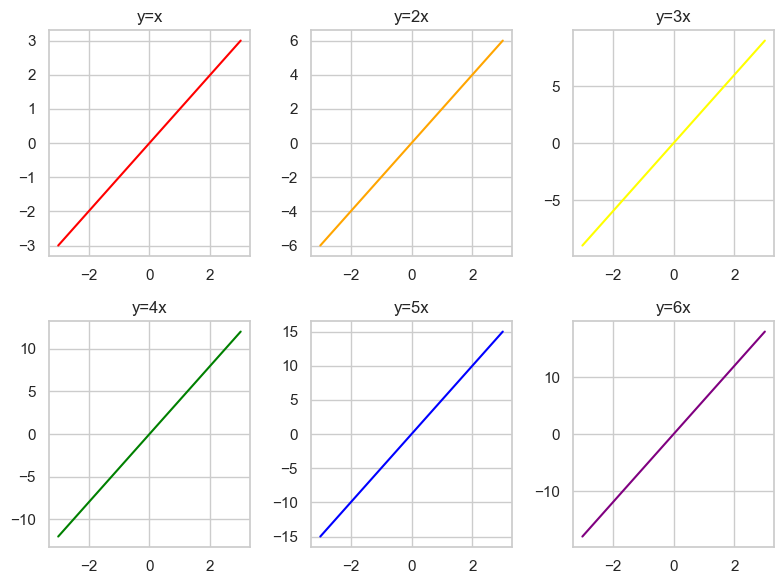

In [82]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
# The above line gives me a figure with six subplots,
# arranged in two rows of three.

X = np.linspace(-3, 3, 100)
Ys = [[j*x for x in X] for j in range(1, 7)]

ax[0, 0].plot(X, Ys[0], c='red')
ax[0, 0].set_title('y=x')

ax[0, 1].plot(X, Ys[1], c='orange')
ax[0, 1].set_title('y=2x')

ax[0, 2].plot(X, Ys[2], c='yellow')
ax[0, 2].set_title('y=3x')

ax[1, 0].plot(X, Ys[3], c='green')
ax[1, 0].set_title('y=4x')

ax[1, 1].plot(X, Ys[4], c='blue')
ax[1, 1].set_title('y=5x')

ax[1, 2].plot(X, Ys[5], c='purple')
ax[1, 2].set_title('y=6x')

plt.tight_layout()

## Slightly Different Notation

Note we could change the notation to unpack the passed axes in different ways. This can be useful in how we use the axis to make different plots.

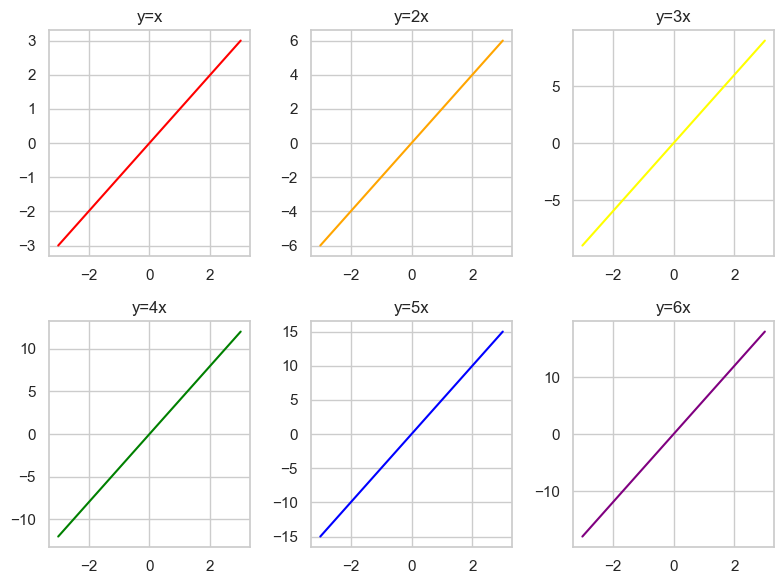

In [83]:
# This saves two arrays of axes representing each row and elements referring to 
# the columns
fig, (ax_row0,ax_row1) = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

Ys = [[j*x for x in X] for j in range(1, 7)]

## First Row
ax_row0[0].plot(X, Ys[0], c='red')
ax_row0[0].set_title('y=x')

ax_row0[1].plot(X, Ys[1], c='orange')
ax_row0[1].set_title('y=2x')

ax_row0[2].plot(X, Ys[2], c='yellow')
ax_row0[2].set_title('y=3x')

## Second Row
ax_row1[0].plot(X, Ys[3], c='green')
ax_row1[0].set_title('y=4x')

ax_row1[1].plot(X, Ys[4], c='blue')
ax_row1[1].set_title('y=5x')

ax_row1[2].plot(X, Ys[5], c='purple')
ax_row1[2].set_title('y=6x')

plt.tight_layout()

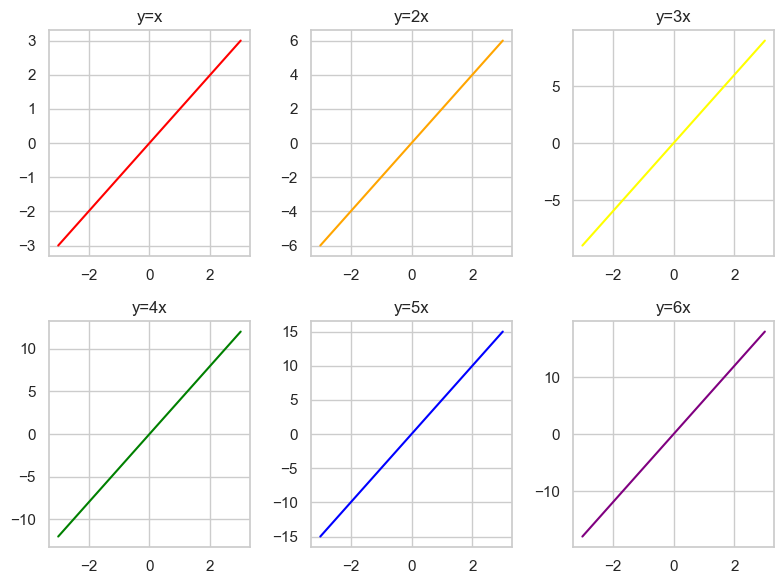

In [84]:
# This unpacks each axis as a separate variable
fig, ((ax00,ax01,ax02),(ax10,ax11,ax12)) = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

Ys = [[j*x for x in X] for j in range(1, 7)]

## First Row
ax00.plot(X, Ys[0], c='red')
ax00.set_title('y=x')

ax01.plot(X, Ys[1], c='orange')
ax01.set_title('y=2x')

ax02.plot(X, Ys[2], c='yellow')
ax02.set_title('y=3x')

## Second Row
ax10.plot(X, Ys[3], c='green')
ax10.set_title('y=4x')

ax11.plot(X, Ys[4], c='blue')
ax11.set_title('y=5x')

ax12.plot(X, Ys[5], c='purple')
ax12.set_title('y=6x')

plt.tight_layout()

## Customize Multiple Plot Grid

We can add some parameters to `plt.subplots()` that allow us to treat the different axes the same

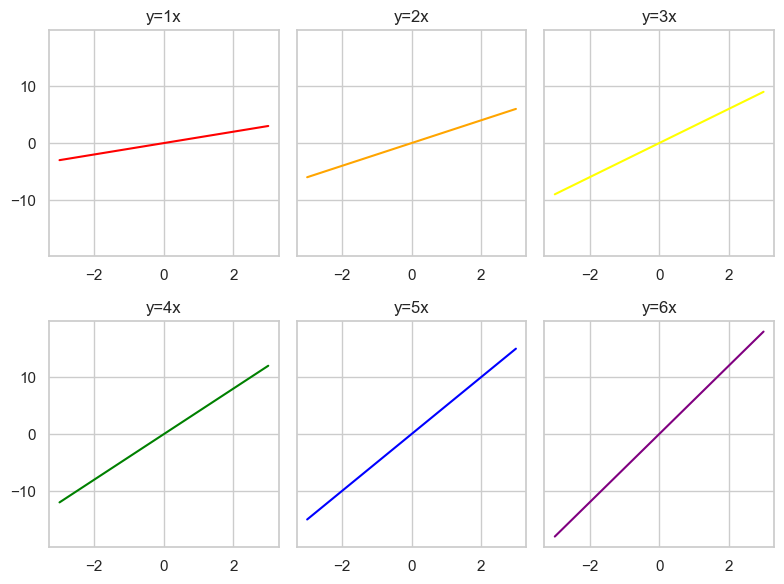

In [85]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(8, 6),
                sharey=True     # This allows for the y-axis to be consistent
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1

plt.tight_layout()

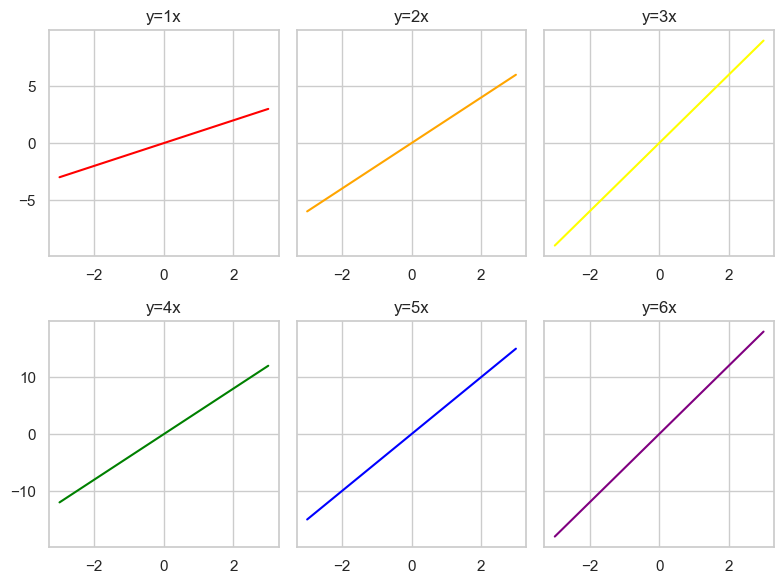

In [86]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(8, 6),
                sharey='row'    # y-axis to be consistent for each row
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1

plt.tight_layout()

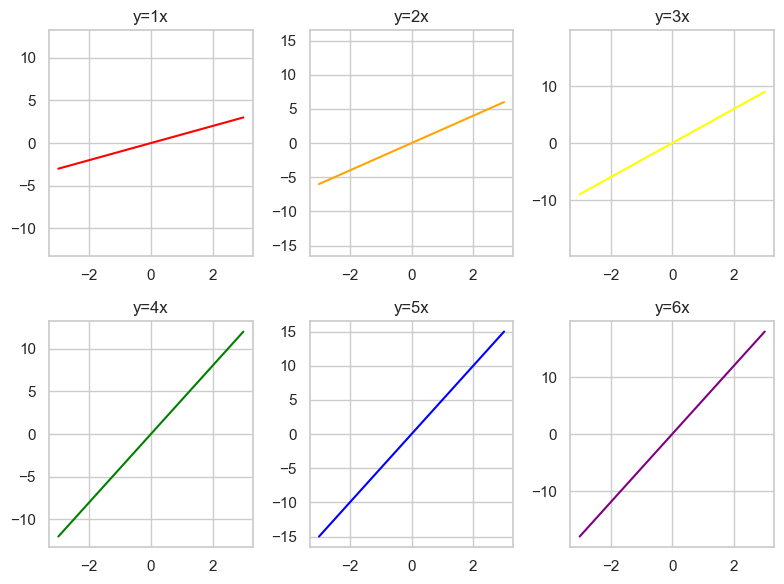

In [87]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(8, 6),
                sharey='col'    # y-axis to be consistent for each column
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1

plt.tight_layout()

## Multiple Plots Exercise

The function below will plot given numbers (coordinates) in the center of a given subplot:

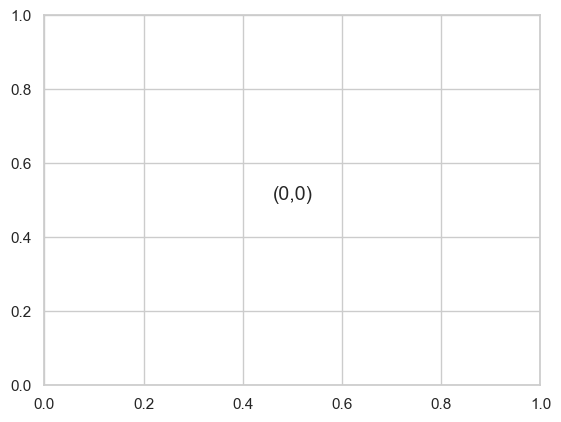

In [88]:
def plot_grid_coor(axis, x, y):
    string_to_plot = f'({x},{y})'
    axis.text(0.5, 0.5, string_to_plot, fontsize=14, ha='center')
    
## Example usage
fig, ax = plt.subplots()
plot_grid_coor(ax,0,0)

Using the function above, create a 2-by-4 grid of subplots with the coordinate of the grid in the middle. 

Your result should look something like this:

![](images/ex_subplots_solution.png)

In [89]:
# Your Code Here

<details>
  <summary>Possible Solution</summary>

```python
nrows=2
ncols=4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,6)) 

for i in range(nrows):
    for j in range(ncols):
        plot_grid_coor(ax[i, j],x=i,y=j)

plt.tight_layout()
```
    
</details>

## Bonus Exercise

Make other tweaks that you've learned to the `plot_grid_coor()` function to customize what will be plotted in each subplot.

In [90]:
## Make your custom changes to this function
def my_plot_grid_coor(axis, x, y):
    string_to_plot = f'({x},{y})'
    axis.text(0.5, 0.5, string_to_plot, fontsize=14, ha='center')

# Level Up: Additional Customization

## Adding Text

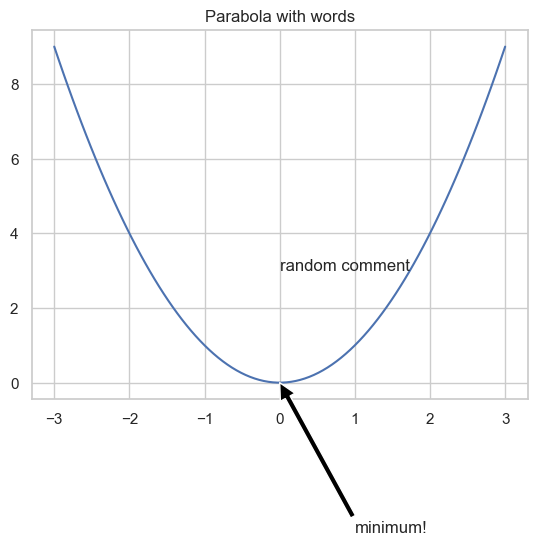

In [91]:
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.set_title('Parabola with words')
ax.text(s='random comment', x=0, y=3)
ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

## Style Sheets

[Style Sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html) can add extra customization to your plots.

In [92]:
# Uses this "style" for the rest of your notebook
plt.style.use('fivethirtyeight')

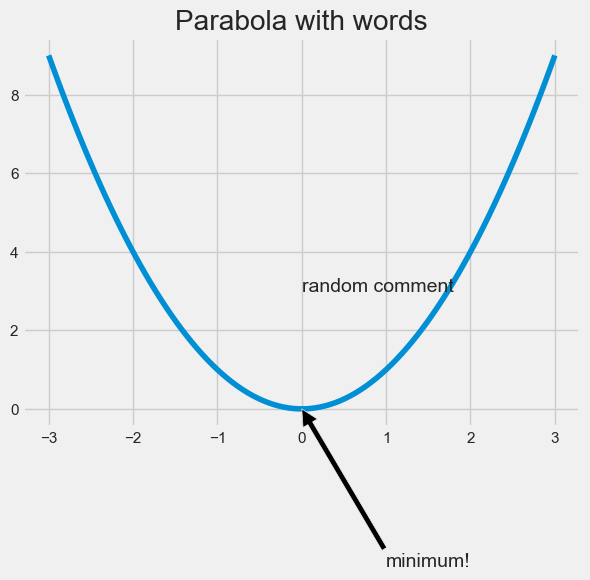

In [93]:
## Showing a plot with this style
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.set_title('Parabola with words')
ax.text(s='random comment', x=0, y=3)
ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

In [94]:
# Go back to the default style 
plt.style.use('default')

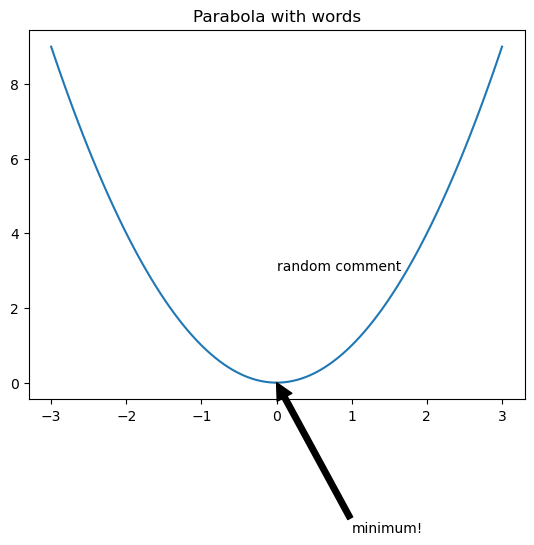

In [95]:
## Showing a plot with the default style
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.set_title('Parabola with words')
ax.text(s='random comment', x=0, y=3)
ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

### Context Manager for Temporary Style

We can have temporary style change by using a [context manager for our style](https://matplotlib.org/stable/tutorials/introductory/customizing.html#temporary-styling).

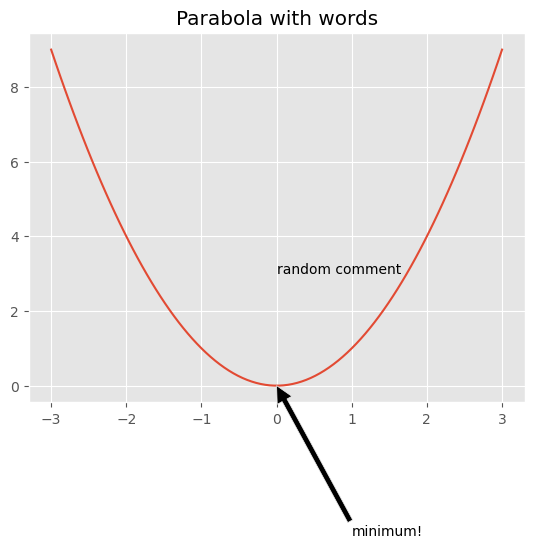

In [96]:
# Allows your us to use a temporary style just for the plot in block of code
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()

    X = np.linspace(-3, 3, 100)
    y = X**2
    ax.plot(X, y)
    ax.set_title('Parabola with words')
    ax.text(s='random comment', x=0, y=3)
    ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

### The xkcd Style

The [xkcd style](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xkcd.html) can be a convenient style when you want to emphasize that the data shouldn't be taken seriously (such as an estimate versus showing real data).

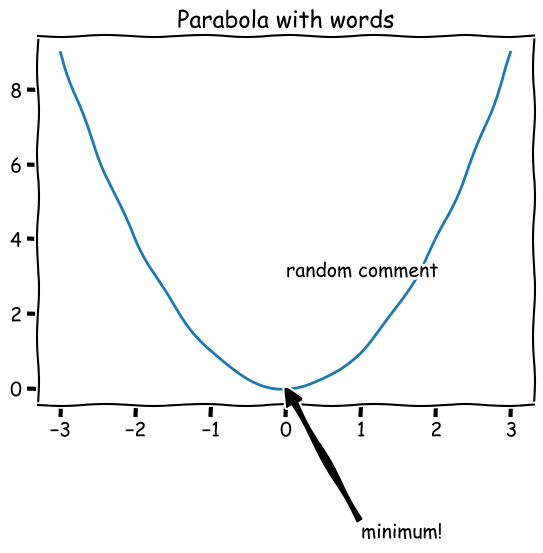

In [97]:
# This allows to use the xkcd style temporarily
with plt.xkcd():
    fig, ax = plt.subplots()

    X = np.linspace(-3, 3, 100)
    y = X**2
    ax.plot(X, y)
    ax.set_title('Parabola with words')
    ax.text(s='random comment', x=0, y=3)
    ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

# Level Up: Seaborn

Seaborn is a wrapper around matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[List of Graphing Methods for Seaborn](https://seaborn.pydata.org/api.html#relational-api)

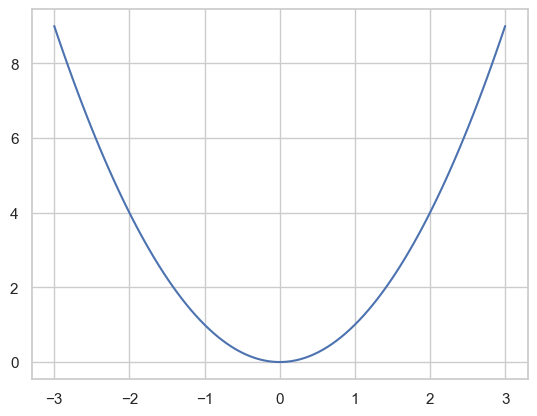

In [98]:
# The `style` parameter can be set equal to
# 'white', 'dark', 'whitegrid', 'darkgrid', or
# 'ticks'

sns.set(style='whitegrid')
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y);

## Scatter Plot

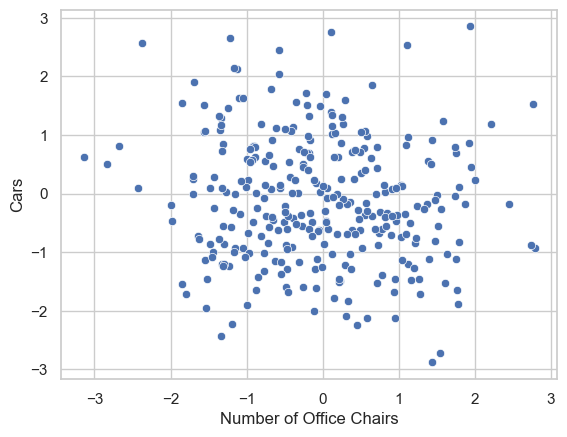

In [99]:
fig, ax = plt.subplots()

x, y = np.random.randn(2, 300)

# With Seaborn we can stisll use the subplots syntax by passing our
# axis object into the graphing function

sns.scatterplot(x=x, y=y, ax=ax)
ax.set_ylabel('Cars')
ax.set_xlabel('Number of Office Chairs');

## Box Plot

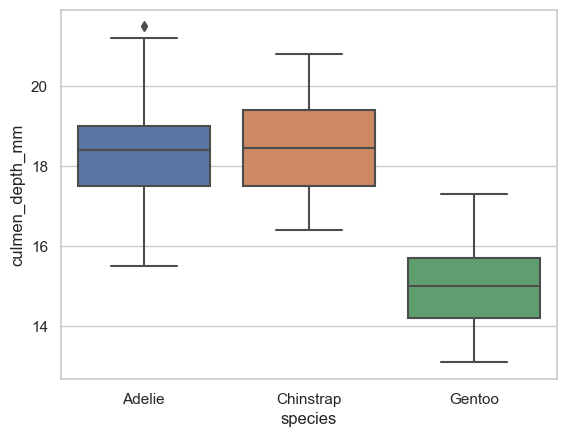

In [100]:
fig, ax = plt.subplots()

sns.boxplot(x=penguins['species'],
           y=penguins['culmen_depth_mm'],
            ax=ax);

## Violin Plot

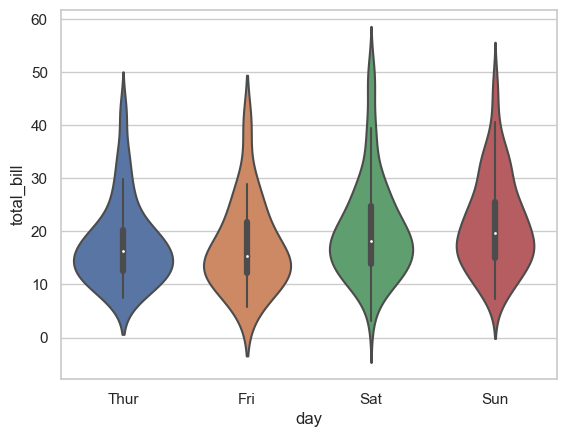

In [101]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

sns.violinplot(data=tips, x="day", y="total_bill");

## Kernel Density Estimation Plot

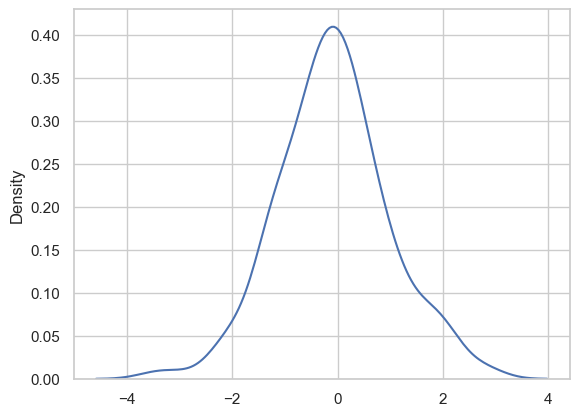

In [102]:
sample = stats.norm.rvs(size=200)

sns.kdeplot(sample);

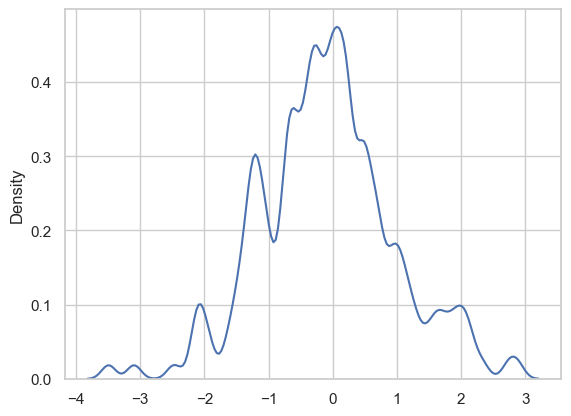

In [103]:
sns.kdeplot(sample, bw_adjust=0.3);

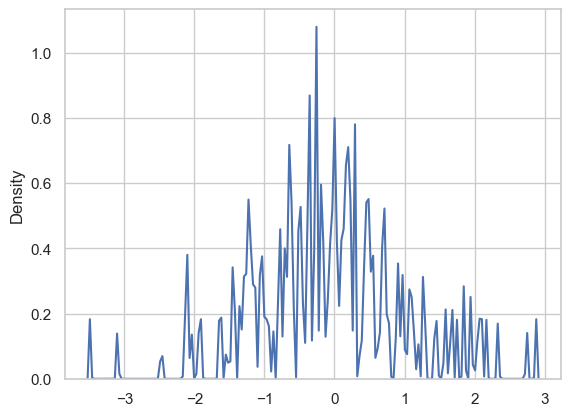

In [104]:
sns.kdeplot(sample, bw_adjust=0.03);

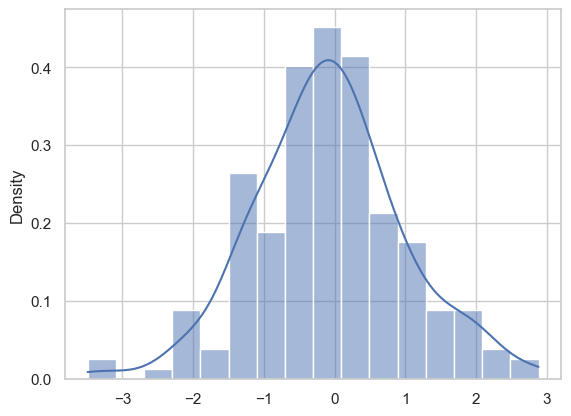

In [105]:
sns.histplot(sample, stat='density', kde=True);

## Seaborn Datasets

In [106]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [107]:
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


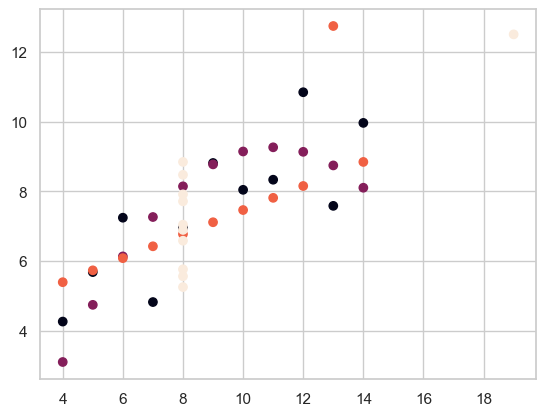

In [108]:
fig, ax = plt.subplots()
ax.scatter(ans['x'], ans['y'], c=ans['dataset'].map({'I': 1,
                                                     'II': 2,
                                                     'III': 3,
                                                     'IV': 4}));